<a href="https://colab.research.google.com/github/affanmirza1/Database/blob/main/Programming_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [70]:
import sqlite3

conn = sqlite3.connect('/content/beegeez_sales_data_sqlite3.db')
c = conn.cursor()

c.execute("SELECT * FROM sales")

rows = c.fetchall()

for row in rows:
    print(row)


('Australia and Oceania', 'Tuvalu', 'Baby Food', 'Offline', 'H', '2010-05-28', 669165933, '2010-06-27', 9925, 255.28, 159.42, 2533654.0, 1582243.5, 951410.5)
('Central America and the Caribbean', 'Grenada', 'Cereal', 'Online', 'C', '2012-08-22', 963881480, '2012-09-15', 2804, 205.7, 117.11, 576782.8, 328376.44, 248406.36)
('Europe', 'Russia', 'Office Supplies', 'Offline', 'L', '2014-05-02', 341417157, '2014-05-08', 1779, 651.21, 524.96, 1158502.59, 933903.84, 224598.75)
('Sub-Saharan Africa', 'Sao Tome and Principe', 'Fruits', 'Online', 'C', '2014-06-20', 514321792, '2014-07-05', 8102, 9.33, 6.92, 75591.66, 56065.84, 19525.82)
('Sub-Saharan Africa', 'Rwanda', 'Office Supplies', 'Offline', 'L', '2013-02-01', 115456712, '2013-02-06', 5062, 651.21, 524.96, 3296425.02, 2657347.52, 639077.5)
('Australia and Oceania', 'Solomon Islands', 'Baby Food', 'Online', 'C', '2015-02-04', 547995746, '2015-02-21', 2974, 255.28, 159.42, 759202.72, 474115.08, 285087.64)
('Sub-Saharan Africa', 'Angola', 'H

In [71]:
# Connect to the BeeGeez Sales Data database
conn = sqlite3.connect("/content/beegeez_sales_data_sqlite3.db")

# Get a cursor object
cur = conn.cursor()

# Retrieve the table schema
cur.execute("PRAGMA table_info(sales)")
schema = cur.fetchall()
print("Sales table schema:")
for column in schema:
    print(column[1], column[2])


Sales table schema:
Region TEXT
Country TEXT
Item_Type TEXT
Sales_Channel TEXT
Order_Priority TEXT
Order_Date DATE
Order_ID INTEGER
Ship_Date DATE
Units_Sold INTEGER
Unit_Price REAL
Unit_Cost REAL
Total_Revenue REAL
Total_Cost REAL
Total_Profit REAL


In [78]:

# Convert the Order_Date column to a datetime data type
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Preview the dataframe with the updated data types
df.dtypes



Order_Date       datetime64[ns]
Total_Revenue           float64
Total_Profit            float64
dtype: object

In [79]:

# Group the data by year and calculate the total revenue and profit for each year
df_yearly = df.groupby(df['Order_Date'].dt.year).agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'})

# Preview the resulting dataframe
df_yearly.head()


,Total_Revenue,Total_Profit
Order_Date,,
2010,19186024.92,6629567.43
2011,11129166.07,2741008.23
2012,31898644.52,9213010.12
2013,20330448.66,6715420.04
2014,16630214.43,5879461.68


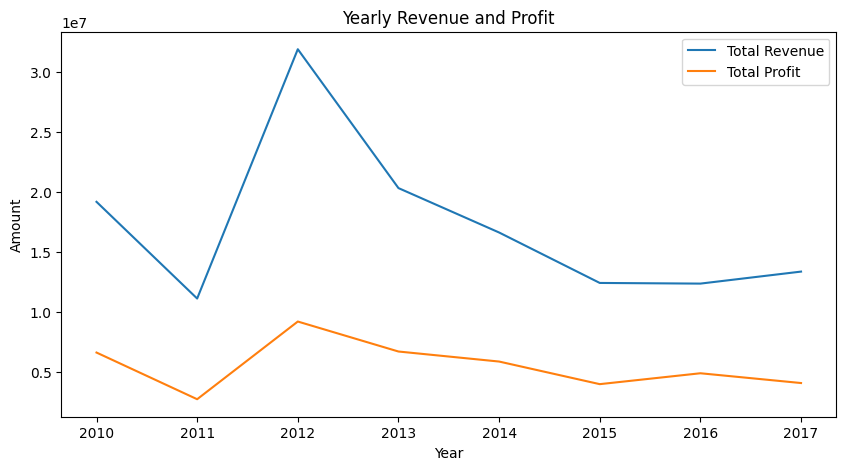

In [81]:

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_yearly.index, df_yearly['Total_Revenue'], label='Total Revenue')
ax.plot(df_yearly.index, df_yearly['Total_Profit'], label='Total Profit')

ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Yearly Revenue and Profit')

ax.legend()

plt.show()


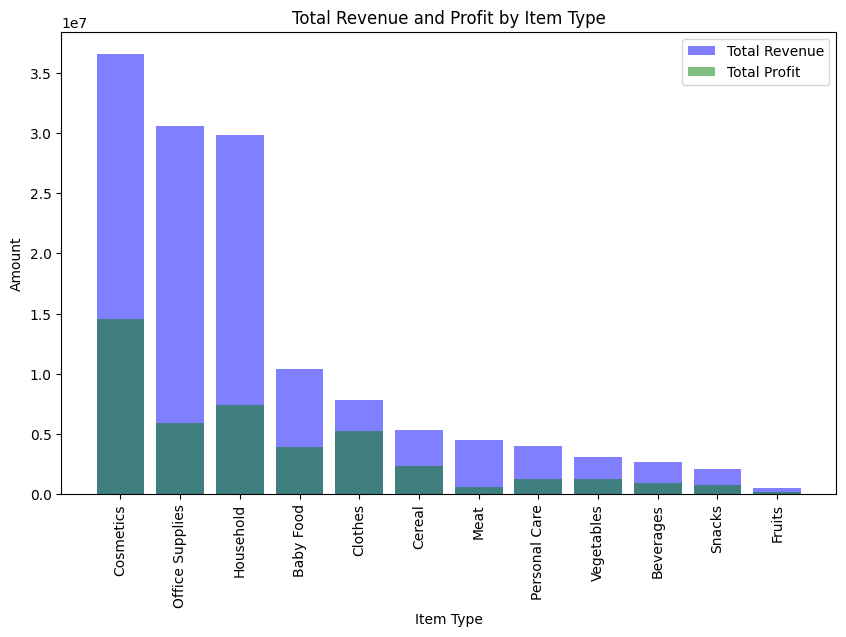

In [83]:
query = "SELECT Item_Type, SUM(Total_Revenue) AS Total_Revenue, SUM(Total_Profit) AS Total_Profit FROM Sales GROUP BY Item_Type ORDER BY Total_Revenue DESC"
df = pd.read_sql_query(query, conn)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Item_Type'], df['Total_Revenue'], color='blue', alpha=0.5, label='Total Revenue')
plt.bar(df['Item_Type'], df['Total_Profit'], color='green', alpha=0.5, label='Total Profit')
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Amount')
plt.title('Total Revenue and Profit by Item Type')
plt.legend()
plt.show()

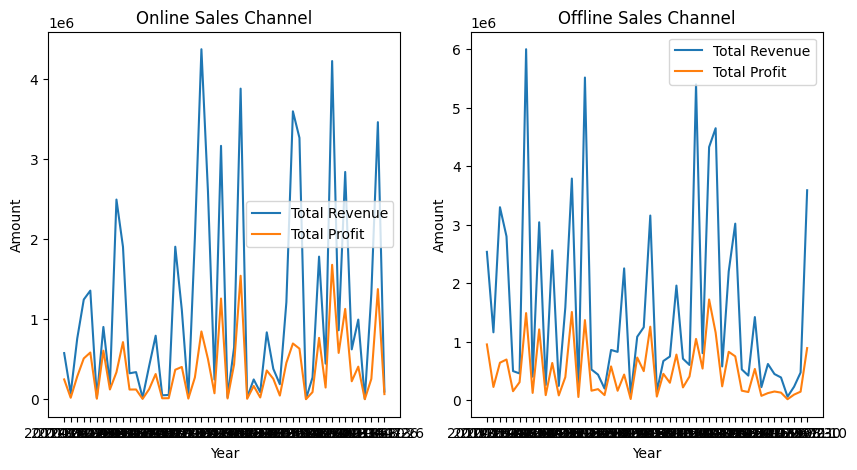

In [88]:
conn = sqlite3.connect("/content/beegeez_sales_data_sqlite3.db")
df = pd.read_sql_query("SELECT * FROM sales", conn)
# Group the data by Sales_Channel and calculate the sum of Total_Revenue and Total_Profit for each channel
df_channel = df.groupby('Sales_Channel').agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'})

# Create line graphs for each channel
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].plot(df[df['Sales_Channel'] == 'Online']['Order_Date'], df[df['Sales_Channel'] == 'Online']['Total_Revenue'], label='Total Revenue')
ax[0].plot(df[df['Sales_Channel'] == 'Online']['Order_Date'], df[df['Sales_Channel'] == 'Online']['Total_Profit'], label='Total Profit')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Amount')
ax[0].set_title('Online Sales Channel')
ax[0].legend()

ax[1].plot(df[df['Sales_Channel'] == 'Offline']['Order_Date'], df[df['Sales_Channel'] == 'Offline']['Total_Revenue'], label='Total Revenue')
ax[1].plot(df[df['Sales_Channel'] == 'Offline']['Order_Date'], df[df['Sales_Channel'] == 'Offline']['Total_Profit'], label='Total Profit')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Amount')
ax[1].set_title('Offline Sales Channel')
ax[1].legend()

plt.show()



